# Employee Retention using Machine Learning Techniques

## By R.Valli Subha (20MDT1015)
### Under the guidance of Dr. David Raj Micheal

### Objective of the project :
In this proposed research work, we’ll see the process of implementing the Machine Learning (ML) and NLP techniques in handling the feedback reviews and ratings collected from 6 different MNCs and the comparison of their performances based on their employee’s reviews and opinions. The paper aims to develop an optimized model and sentimental analysis for predicting employee retention. We'll also look at the factors that cause employee attrition and find which company makes best effort in retaining their employees with the use of the given feedback reviews and ratings data.

### Dataset : https://www.kaggle.com/saqlainrehan/employeesreviews-dataset

The dataset consists of 67529 records and 16 variables among which seven are numeric variables which include numeric and star ratings given by the employees from 1 to 5, and four are text variables including summary, pros, cons, and advice to management by the reviewer employee.

#### Columns :
Company, Location, Dates, Job title, Summary, Pros, Cons, Adivce to management, Overall ratings, Work-balance stars, culture-values stars, compensation-benefits stars, senior-management stars, helpful-count and link (glassdoor review link) 

In [ ]:
import numpy as np 
import pandas as pd 
import re #Importing regular expression operations
import string
from wordcloud import WordCloud # to represent the text data (visually) in which the size of each word indicates its frequency or importance.
from sklearn.feature_extraction import text 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings("ignore")

In [ ]:
# df=pd.read_csv("employee_reviews.csv",encoding='latin-1',index_col=0)
# df.info()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/employee_reviews.csv",encoding='latin-1',index_col=0)
#df.info

In [ ]:
df.head(3)

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
serial,,,,,,,,,,,,,,,,
1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,0,https://www.glassdoor.com/Reviews/Google-Revie...
2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3,2094,https://www.glassdoor.com/Reviews/Google-Revie...
3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,4,5,5,4,949,https://www.glassdoor.com/Reviews/Google-Revie...


In [ ]:
print(df.shape)

(67529, 16)


In [ ]:
print(df.isnull().sum())

company                         0
location                        0
dates                           0
job-title                       0
summary                       120
pros                            0
cons                            0
advice-to-mgmt                297
overall-ratings                 0
work-balance-stars              0
culture-values-stars            0
carrer-opportunities-stars      0
comp-benefit-stars              0
senior-mangemnet-stars          0
helpful-count                   0
link                            0
dtype: int64


In [ ]:
df.describe()

,overall-ratings,helpful-count
count,67529.000000,67529.000000
mean,3.826075,1.268211
std,1.154989,16.085852
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,1.000000
max,5.000000,2094.000000


#### Segregating the data company wise to find their individual shape

In [ ]:
gog_df = df.apply(lambda row: row[df['company'].isin(['google'])])
print("Shape of Google : ", gog_df.shape)

amz_df = df.apply(lambda row: row[df['company'].isin(['amazon'])])
print("Shape of Amazon : ",amz_df.shape)

fb_df = df.apply(lambda row: row[df['company'].isin(['facebook'])])
print("Shape of Facebook : ",fb_df.shape)

net_df = df.apply(lambda row: row[df['company'].isin(['netflix'])])
print("Shape of Netflix : ",net_df.shape)

apl_df = df.apply(lambda row: row[df['company'].isin(['apple'])])
print("Shape of Apple : ",apl_df.shape)

mcf_df = df.apply(lambda row: row[df['company'].isin(['microsoft'])])
print("Shape of Microsoft : ",mcf_df.shape)

Shape of Google :  (7819, 16)
Shape of Amazon :  (26430, 16)
Shape of Facebook :  (1590, 16)
Shape of Netflix :  (810, 16)
Shape of Apple :  (12950, 16)
Shape of Microsoft :  (17930, 16)


In [ ]:
df['combined_reviews'] = df['summary']+'. '+df['advice-to-mgmt']+'. '+df['pros']+'. '+df['cons']
df['combined_reviews']

serial
1        Best Company to work for. none. People are sma...
2        Moving at the speed of light, burn out is inev...
3        Great balance between big-company security and...
4        The best place I've worked and also the most d...
5        Unique, one of a kind dream job. Promote manag...
                               ...                        
67525    Enriching experience for a beginner but bad fo...
67526    A complex and interesting experience. none. - ...
67527    Good Place to Work. none. Nice place to work. ...
67528    It's a competitive work place, with overload w...
67529    Used to be great. Good people keep leaving...y...
Name: combined_reviews, Length: 67529, dtype: object

### Creating a new dataframe which would contain only the needed column attributes.

In [ ]:
dtf = df[['company','job-title', 'combined_reviews',
        'overall-ratings', 'work-balance-stars',
       'culture-values-stars', 'carrer-opportunities-stars',
       'comp-benefit-stars', 'senior-mangemnet-stars']]

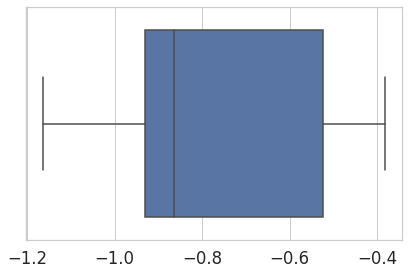

In [251]:
#To find the skewness of the dataset through boxplot.
skew = dtf.skew(axis = 0, skipna = True)
sns.boxplot(skew)

### Data Cleaning

In [ ]:
ratings = dtf[['overall-ratings',
       'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars']]

In [ ]:
ratings.dtypes

overall-ratings                int64
work-balance-stars            object
culture-values-stars          object
carrer-opportunities-stars    object
comp-benefit-stars            object
senior-mangemnet-stars        object
dtype: object

In [ ]:
print("Unique Values in Overall rating column : " , ratings['overall-ratings'].unique())
print("Unique Values in work-balance-stars column : ", ratings['work-balance-stars'].unique())
print("Unique Values in culture-values-stars column : ", ratings['culture-values-stars'].unique())
print("Unique Values in carrer-opportunities-stars column : ", ratings['carrer-opportunities-stars'].unique())
print("Unique Values in comp-benefit-stars column : ", ratings['comp-benefit-stars'].unique())
print("Unique Values in senior-mangemnet-stars column : ", ratings['senior-mangemnet-stars'].unique())

Unique Values in Overall rating column :  [5 4 3 2 1]
Unique Values in work-balance-stars column :  ['4' '2' '5' 'none' '3' '1' '4.5' '2.5' '3.5' '1.5']
Unique Values in culture-values-stars column :  ['5' '3' '4' 'none' '2' '1']
Unique Values in carrer-opportunities-stars column :  ['5' '3' '4' 'none' '2' '1' '3.5' '2.5' '4.5' '1.5']
Unique Values in comp-benefit-stars column :  ['4' '5' 'none' '3' '2' '1' '4.5' '3.5' '2.5' '1.5']
Unique Values in senior-mangemnet-stars column :  ['5' '3' '4' 'none' '1' '2' '4.5' '3.5' '2.5' '1.5']


In [ ]:
#step 1
ratings['overall-ratings'] = ratings['overall-ratings'].replace('None', np.nan)
ratings['overall-ratings'] = ratings['overall-ratings'].replace('Nan', np.nan)
ratings['overall-ratings'] = ratings['overall-ratings'].replace('none', np.nan)

ratings['work-balance-stars'] = ratings['work-balance-stars'].replace('None', np.nan)
ratings['work-balance-stars'] = ratings['work-balance-stars'].replace('Nan', np.nan)
ratings['work-balance-stars'] = ratings['work-balance-stars'].replace('none', np.nan)

ratings['culture-values-stars'] = ratings['culture-values-stars'].replace('None', np.nan)
ratings['culture-values-stars'] = ratings['culture-values-stars'].replace('Nan', np.nan)
ratings['culture-values-stars'] = ratings['culture-values-stars'].replace('none', np.nan)

ratings['carrer-opportunities-stars'] = ratings['carrer-opportunities-stars'].replace('None', np.nan)
ratings['carrer-opportunities-stars'] = ratings['carrer-opportunities-stars'].replace('Nan', np.nan)
ratings['carrer-opportunities-stars'] = ratings['carrer-opportunities-stars'].replace('none', np.nan)

ratings['comp-benefit-stars'] = ratings['comp-benefit-stars'].replace('None', np.nan)
ratings['comp-benefit-stars'] = ratings['comp-benefit-stars'].replace('Nan', np.nan)
ratings['comp-benefit-stars'] = ratings['comp-benefit-stars'].replace('none', np.nan)

ratings['senior-mangemnet-stars'] = ratings['senior-mangemnet-stars'].replace('None', np.nan)
ratings['senior-mangemnet-stars'] = ratings['senior-mangemnet-stars'].replace('Nan', np.nan)
ratings['senior-mangemnet-stars'] = ratings['senior-mangemnet-stars'].replace('none', np.nan)

In [ ]:
ratings['work-balance-stars'] = ratings['work-balance-stars'].astype(float)
ratings['culture-values-stars'] = ratings['culture-values-stars'].astype(float)
ratings['carrer-opportunities-stars'] = ratings['carrer-opportunities-stars'].astype(float)
ratings['comp-benefit-stars'] = ratings['comp-benefit-stars'].astype(float)
ratings['senior-mangemnet-stars'] = ratings['senior-mangemnet-stars'].astype(float)

In [ ]:
#step2
ratings['overall-ratings']= ratings['overall-ratings'].fillna((ratings['overall-ratings'].mean(skipna=True)))
ratings['work-balance-stars']= ratings['work-balance-stars'].fillna((ratings['work-balance-stars'].mean(skipna=True)))
ratings['culture-values-stars']= ratings['culture-values-stars'].fillna((ratings['culture-values-stars'].mean(skipna=True)))
ratings['carrer-opportunities-stars']= ratings['carrer-opportunities-stars'].fillna((ratings['carrer-opportunities-stars'].mean(skipna=True)))
ratings['comp-benefit-stars']= ratings['comp-benefit-stars'].fillna((ratings['comp-benefit-stars'].mean(skipna=True)))
ratings['senior-mangemnet-stars']= ratings['senior-mangemnet-stars'].fillna((ratings['senior-mangemnet-stars'].mean(skipna=True)))


In [ ]:
ratings.dtypes

overall-ratings                 int64
work-balance-stars            float64
culture-values-stars          float64
carrer-opportunities-stars    float64
comp-benefit-stars            float64
senior-mangemnet-stars        float64
dtype: object

In [ ]:
ratings

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars
serial,,,,,,
1,5,4.0,5.000000,5.0,4.0,5.0
2,4,2.0,3.000000,3.0,5.0,3.0
3,5,5.0,4.000000,5.0,5.0,4.0
4,5,2.0,5.000000,5.0,4.0,5.0
5,5,5.0,5.000000,5.0,5.0,5.0
...,...,...,...,...,...,...
67525,3,3.0,3.784451,4.0,4.0,2.0
67526,3,1.5,3.784451,2.5,4.0,2.5
67527,4,3.0,3.784451,4.0,4.5,3.5


In [ ]:
dtf[['overall-ratings',
       'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars']] = ratings[['overall-ratings',
       'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars']]

In [ ]:
dtf.describe()

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars
count,67529.000000,67529.000000,67529.000000,67529.000000,67529.000000,67529.000000
mean,3.826075,3.373254,3.784451,3.634035,3.942503,3.322522
std,1.154989,1.229057,1.158941,1.159480,0.981985,1.234583
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.373254,4.000000,4.000000,4.000000,3.322522
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
dtf.sample(5)

,company,job-title,combined_reviews,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars
serial,,,,,,,,,
12494,amazon,Current Employee - Anonymous Employee,"Overall, great place to work!. Maybe review yo...",4,2.0,4.0,5.0,3.0,5.0
38961,apple,Current Employee - Specialist,Sales Specialist. Find a way to not overload m...,5,5.0,5.0,3.0,5.0,5.0
14020,amazon,Former Employee - Anonymous Employee,Warehouse Associate. none. Good pay and benefi...,3,1.0,2.0,3.0,5.0,2.0
19238,amazon,Current Employee - Process Assistant,Not so innovate.. Recognize your employees. Do...,1,1.0,2.0,1.0,3.0,1.0
23435,amazon,Former Employee - Customer Support - Corporate,"Some stereotypes are true, but I still liked i...",3,2.0,4.0,4.0,3.0,3.0


### Text Preprocessing

In [ ]:
def clean_txt(text):
    text = str(text)
    for n in range(10):
        text = text.replace(str(n) , '') #replacing n with empty quotes 
    text = text.lower() #lowercase  conversion
    text = text.replace("(" , "") #replacing brackets
    text = text.replace(")" , "") #replacing quotes
    text = re.sub('\[.*?\]', '', text) #to replace multiple patterns with single quotes
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text) #to remove all the non-word characters
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub(r'[^\x00-\x7f]', '', text) #Replacing non-ASCII characters with single space 
    text = text.replace( " \ " , "" ) #replacing back slash with single space
    text = text.replace("/" , "") #replacing front slash with single space
    
    return text

In [ ]:
df['summary'] =  df['summary'].apply(lambda x : clean_txt(x)) #applying clean function in each line of summary
#removing latent chars, numbers, special chars - cleaning
summary_corpus = df[["summary","company"]]

combined_smry_dict = {} 
for comp in df['company'].unique():
    combined_summary = "" 
    for summary in df['summary'][df['company'] == comp]: #converting company into key and summary to value
        combined_summary = combined_summary +" "+summary
    
    combined_smry_dict[comp] = combined_summary

df_summary = pd.DataFrame(data=combined_smry_dict , index = [0])
df_summary = pd.DataFrame.copy(df_summary.T)
df_summary.columns = ["summary_corpus"]
df_summary['company'] = df_summary.index

### Sentiment Analysis using VADER Package
In this method, we will use the Sentiment Intensity Analyser which uses the VADER Lexicon. VADER is a long-form for Valence Aware and sEntiment Reasoner, a rule-based sentiment analysis tool. VADER calculates text emotions and determines whether the text is positive, neutral or, negative. This analyzer calculates text sentiment and produces four different classes of output scores: positive, negative, neutral, and compound.
Here, we will make use of the Compound Score. A compound score is the aggregate of the score of a word, or precisely, the sum of all words in the lexicon, normalized between -1 and 1. 

In [ ]:
!pip install VaderSentiment

dtf['combined_reviews'] = dtf['combined_reviews'].apply(lambda x : clean_txt(x)) #applying clean function in each line of summary
#removing latent characters, numbers, special characters - cleaning

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in dtf['combined_reviews']]
dtf['vader_sentiment_score'] = polarity

# function to analyse 
def vader_analysis(compound):
    if compound >= 0:
        return 'Positive'
    elif compound <= 0 :
        return 'Negative'
    else:
        return 'Neutral'
    
dtf['vader_Analysis'] = dtf['vader_sentiment_score'].apply(vader_analysis)

dtf.head()

,company,job-title,combined_reviews,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,vader_sentiment_score,vader_Analysis
serial,,,,,,,,,,,
1,google,Current Employee - Anonymous Employee,best company to work for none people are smart...,5,4.0,5.0,5.0,4.0,5.0,0.73,Positive
2,google,Former Employee - Program Manager,moving at the speed of light burn out is inevi...,4,2.0,3.0,3.0,5.0,3.0,0.99,Positive
3,google,Current Employee - Software Engineer III,great balance between bigcompany security and ...,5,5.0,4.0,5.0,5.0,4.0,1.00,Positive
4,google,Current Employee - Anonymous Employee,the best place ive worked and also the most de...,5,2.0,5.0,5.0,4.0,5.0,1.00,Positive
5,google,Former Employee - Software Engineer,unique one of a kind dream job promote manager...,5,5.0,5.0,5.0,5.0,5.0,1.00,Positive


In [ ]:
vader_counts = dtf['vader_Analysis'].value_counts()
vader_counts

Positive    55151
Negative    12378
Name: vader_Analysis, dtype: int64

In [ ]:
pol_total = dtf.groupby('company')['vader_Analysis'].value_counts(normalize=False).unstack()
pol_total

vader_Analysis,Negative,Positive
company,,
amazon,6031,20399
apple,2098,10852
facebook,138,1452
google,1224,6595
microsoft,2729,15201
netflix,158,652


To find the overall positive and negative polarity percentage count of given reviews from the dataset.

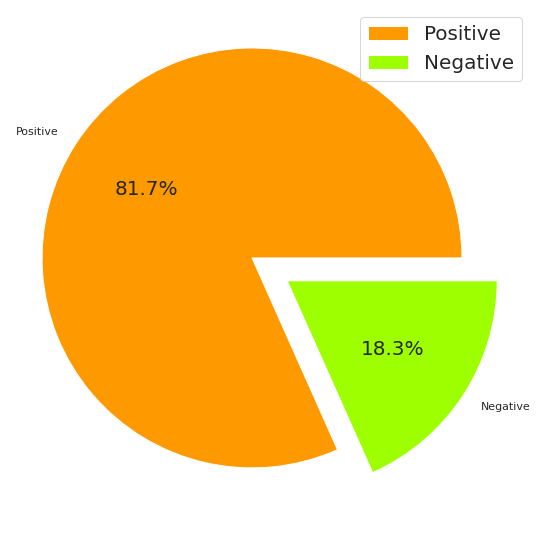

In [ ]:
vader_counts= dtf['vader_Analysis'].value_counts()

sns.set(rc={'axes.facecolor':'white'})
fig, ax = plt.subplots(figsize=(12, 9))
plt.rcParams["font.size"] = "20"
colors = sns.color_palette("gist_rainbow")
plt.pie(vader_counts.values,labels = vader_counts.index, explode = (0.1, 0.1), autopct='%1.1f%%', shadow=False, colors = colors)
leg = ax.legend(prop={"size":20})



In [ ]:
#To add a new column category next to the age group. 
category = pd.cut(dtf['vader_sentiment_score'],bins=[-0.9,-0.5,0.1,0.5,0.9,1.0],labels=["not very satisfied", "not satisfied","neutral", "satisfied","very well satisfied"])
dtf.insert(11, 'polarity_grade', category)
dtf.sample(5)

,company,job-title,combined_reviews,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,vader_sentiment_score,vader_Analysis,polarity_grade
serial,,,,,,,,,,,,
46204,apple,Current Employee - Apple Intern,wonderful place to work i love you apple there...,5,5.0,3.784451,5.0,5.0,5.0,0.84,Positive,satisfied
43961,apple,Current Employee - ASLP Associate,great company to work for none awesome benefit...,5,2.0,5.000000,4.0,5.0,3.0,-0.83,Negative,not very satisfied
4369,google,Current Employee - Engineering Manager,opportunity stability and fun none great perks...,5,4.0,4.000000,5.0,5.0,4.0,0.82,Positive,satisfied
16184,amazon,Current Employee - Anonymous Employee,amazon fulfillment associate none good pay ben...,5,5.0,5.000000,5.0,5.0,4.0,0.74,Positive,satisfied
31625,amazon,Former Employee - Telangana,awesome none have fun work had make history th...,5,5.0,5.000000,5.0,5.0,5.0,0.85,Positive,satisfied


In [ ]:
category_total = dtf.groupby('company')['polarity_grade'].value_counts(normalize=False).unstack()
category_total

,not very satisfied,not satisfied,neutral,satisfied,very well satisfied
company,,,,,
amazon,2468,4343,3605,9066,6545
apple,872,1623,1374,4156,4822
facebook,46,124,109,484,819
google,464,1053,966,2671,2640
microsoft,1070,2164,1945,6075,6563
netflix,55,109,73,220,323


### Exploratory Data Analysis

To find the correlation between the variables

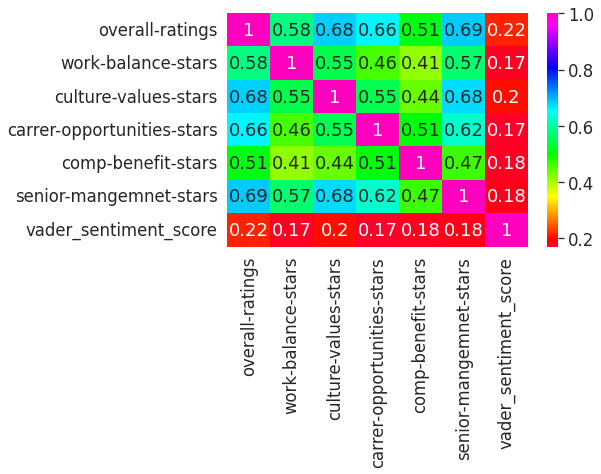

In [ ]:
corr = dtf.corr()# plot the heatmap

sns.set(rc={'axes.facecolor':'white'})

sns.set(font_scale = 1.5)

sns_plot =  sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap ="gist_rainbow")


To find the company that has the highest overall rating distribution

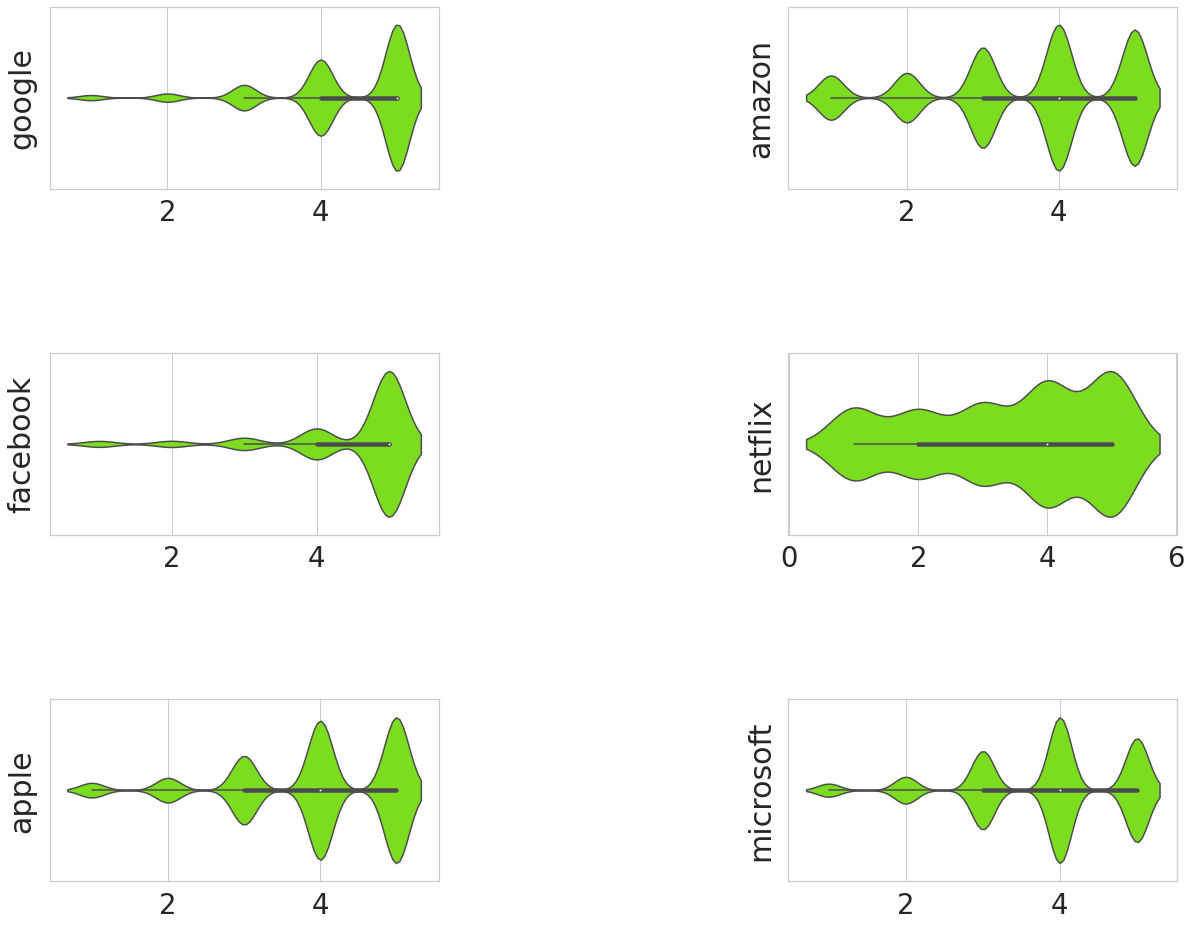

In [ ]:
plt.figure(1 , figsize = (18 , 15))
sns.set(rc={'axes.facecolor':'white'})
sns.set(font_scale = 2.5)
n = 0 
for company in dtf['company'].unique():
    n += 1
    sns.set_style("whitegrid")
    plt.subplot(3 , 2 , n )
    plt.subplots_adjust(hspace = 0.9 , wspace = 0.9)
    plt1 = sns.violinplot(x = 'overall-ratings' , data = dtf.where(dtf['company'] == company), color = "lawngreen")
    plt.xlabel('')
    plt.ylabel(company)
plt.show()


To find the average rating points of the job features

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

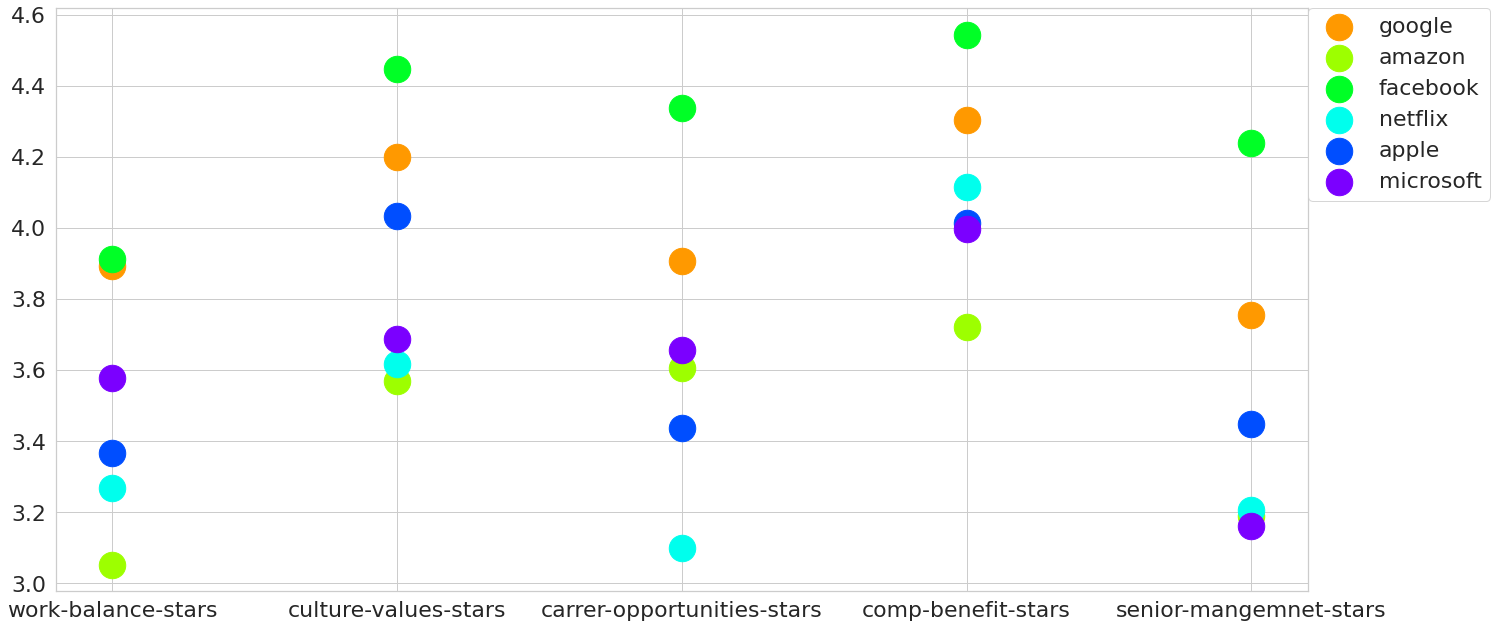

In [254]:
features = ['work-balance-stars' , 'culture-values-stars' , 'carrer-opportunities-stars',
                     'comp-benefit-stars','senior-mangemnet-stars']
index_companies = ['google' , 'amazon' , 'facebook' , 'netflix' , 'apple' , 'microsoft']

mean_rating_dtf = pd.DataFrame(index = index_companies)

for feature in features:
    f = []
    for comp in index_companies:
      #except ValueError:
        f.append(np.mean(dtf[feature][dtf['company'] == comp]))
    mean_rating_dtf[feature] = f
del f

plt.figure(1 , figsize = (20 , 10))
sns.set(rc={'axes.facecolor':'white'})
sns.set(font_scale = 2)
colors = sns.color_palette("gist_rainbow")

sns.set_style("whitegrid")
for n , c  in zip(range(6) , colors):
    plt.scatter(x = np.arange(5) , y = mean_rating_dtf.iloc[n , :].values , s = 700 , c = c  , label = mean_rating_dtf.index[n])
    #plt.scatter(x = np.arange(5) , y = mean_rating_dtf.iloc[n , :].values , s = 700 , c = c  , label = features)
    plt2 = plt.plot(np.arange(5) , mean_rating_dtf.iloc[n , :].values , '-' , color = c , 
             alpha = 0)
    plt.xticks(np.arange(5) , features)
plt.legend(bbox_to_anchor=(1.00, 1), loc=2, borderaxespad=0.)    
plt.show() 


To find the distribution of polarity scores for the combined reviews 

Text(0.5, 1.0, 'Polarity of Combined Reviews')

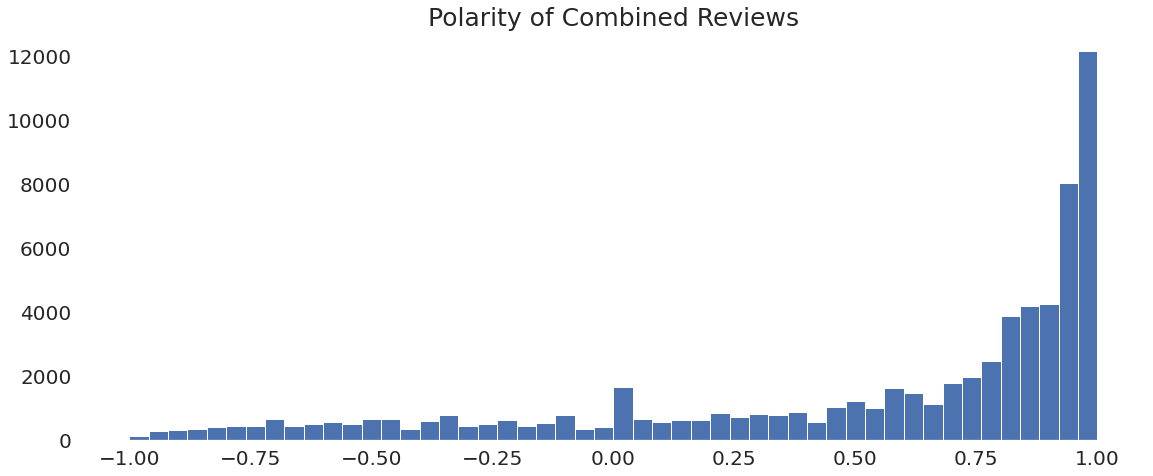

In [ ]:
plt.figure(1 , figsize = (17 , 7))
sns.set(rc={'axes.facecolor':'white'})
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt3 = plt.hist(dtf['vader_sentiment_score'] , bins = 50)
plt.title('Polarity of Combined Reviews', fontsize = 25)


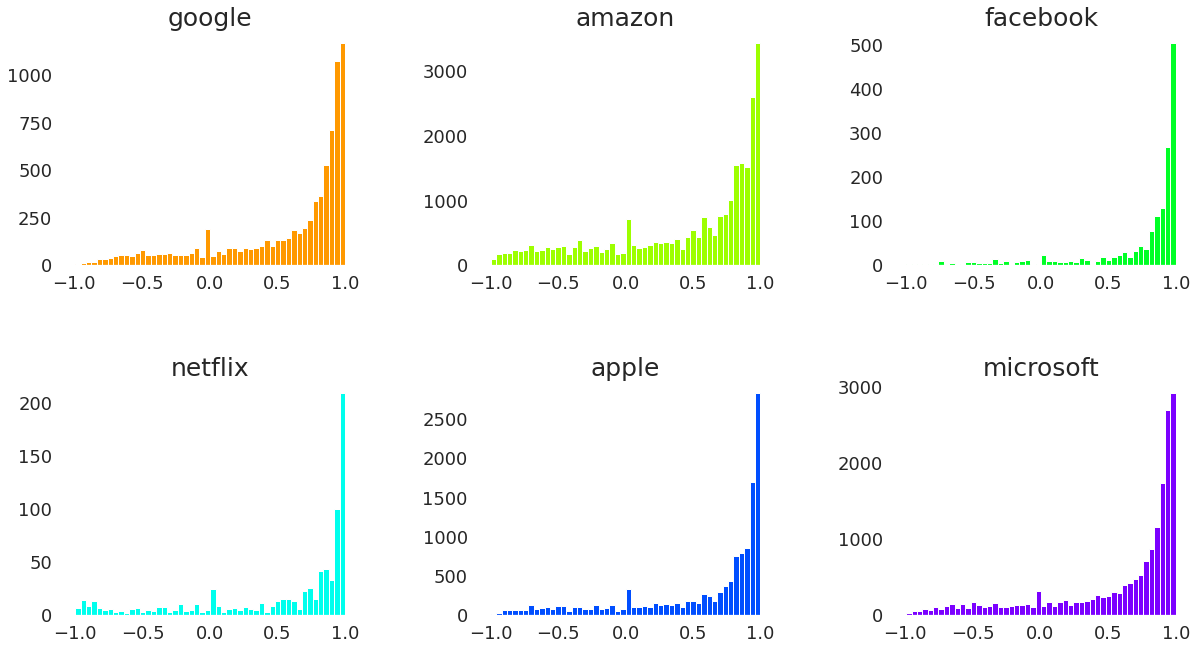

In [ ]:
sns.set(rc={'axes.facecolor':'white'})
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
colors = sns.color_palette("gist_rainbow")
plt.figure(2 , figsize = (18, 10))
n = 0 
for comp , c in zip(index_companies , colors):
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.4)
    plt4 = plt.hist(dtf['vader_sentiment_score'][dtf['company'] == comp], bins = 50, color = c )
    plt.title(comp, fontsize = 25)
plt.show()



To find the count of companies that have reviewed the most in Glassdoor

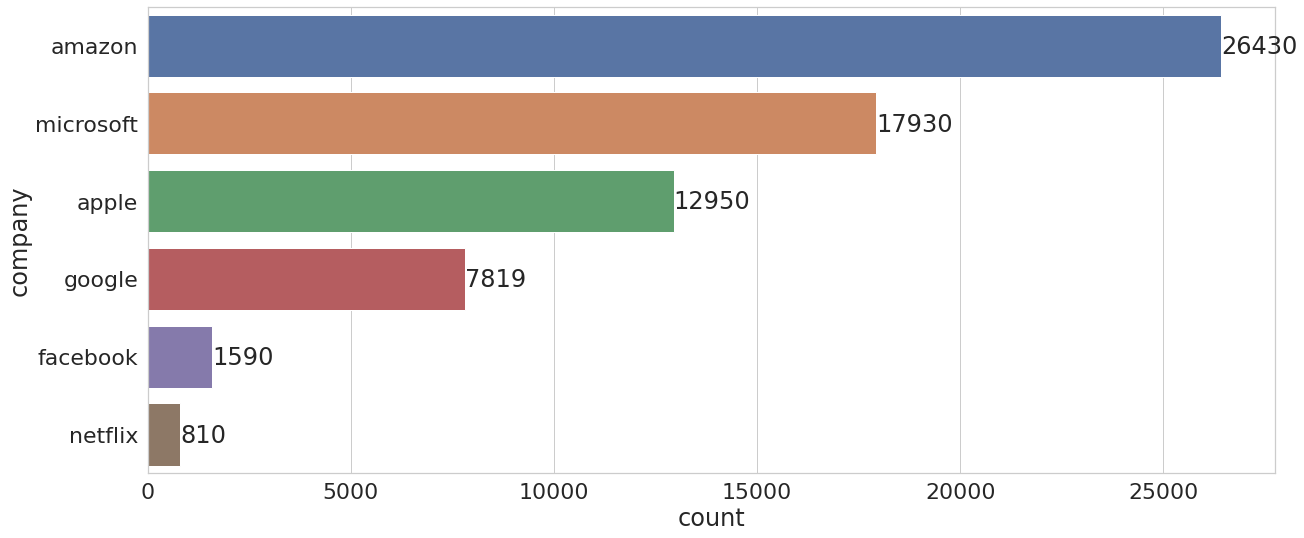

In [ ]:
plt.style.use('fivethirtyeight')
sns.set(rc={'axes.facecolor':'white'})
plt.figure(1 , figsize = (18 , 8))
colors = sns.color_palette("gist_rainbow")
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax = sns.countplot(y = 'company' , data = dtf  , 
              order = dtf['company'].value_counts().index)
initialx=0
for p in ax.patches:
  ax.text(p.get_width(),initialx+p.get_height()/8,'{:1.0f}'.format(p.get_width()))
  initialx+=1

plt.show()


To find which employee and job profile has reviewed the most in Glassdoor

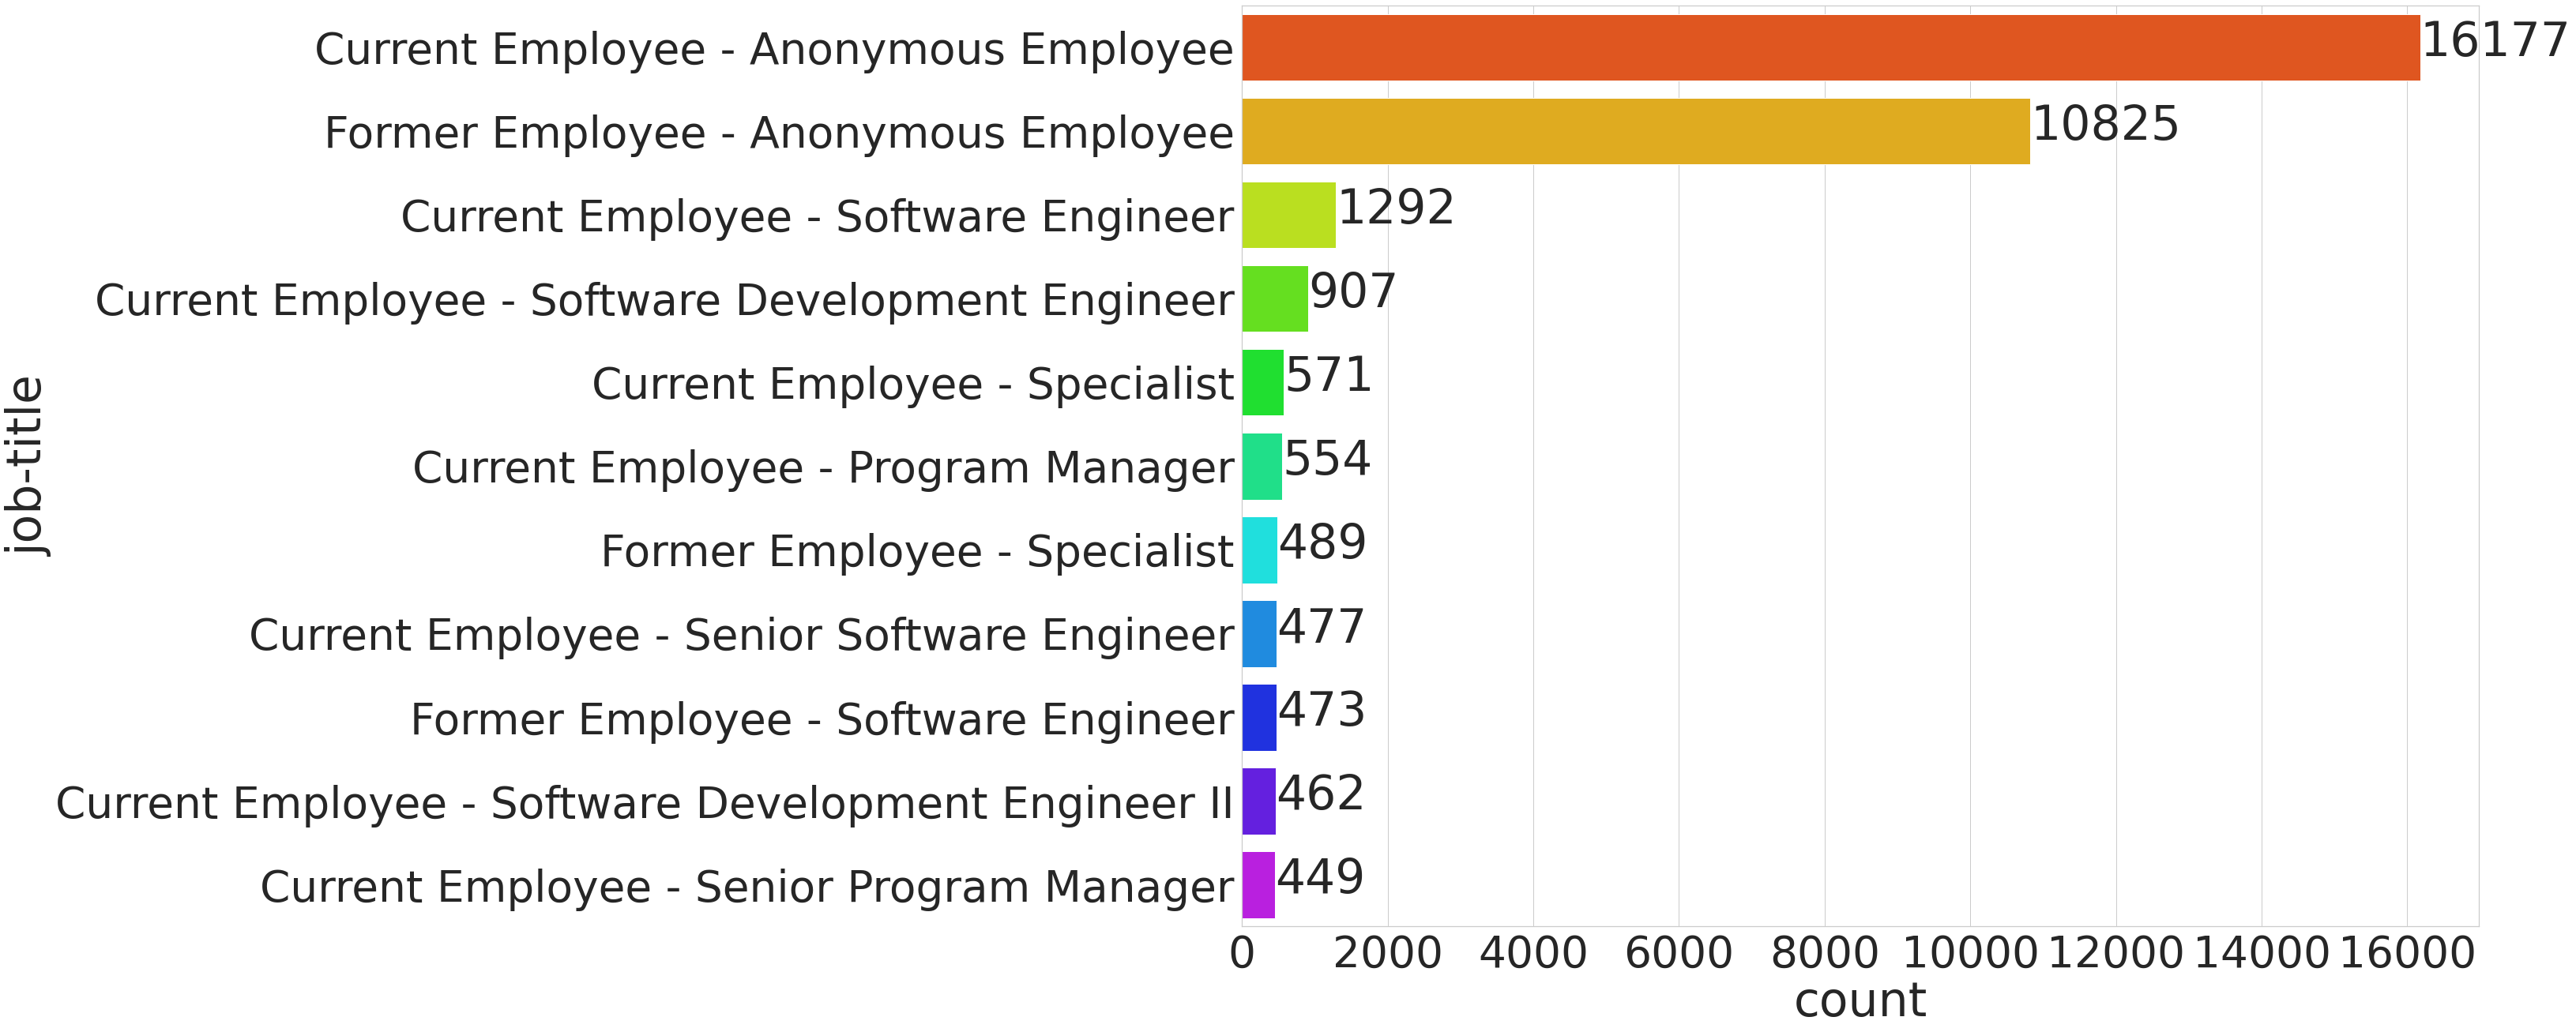

In [ ]:
from collections import Counter

common_job_titles = []
c = Counter(dtf['job-title']).most_common()[:11]
for n in range(11):
    common_job_titles.append(c[n][0])
    
plt.figure(1 , figsize = (25,20))
sns.set(rc={'axes.facecolor':'white'})
sns.set(font_scale = 5)
sns.set_style("whitegrid")
ax = sns.countplot(y = 'job-title' , data = dtf[dtf['job-title'].isin(common_job_titles)] ,
              palette = 'gist_rainbow' , 
              order = dtf[dtf['job-title'].isin(common_job_titles)]['job-title'].value_counts().index)
initialx=0

for p in ax.patches:
  ax.text(p.get_width(),initialx+p.get_height()/8,'{:1.0f}'.format(p.get_width()))
  initialx+=1
plt.show()


Word cloud of overall reviews

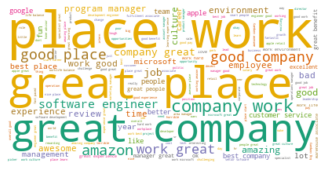

In [ ]:
wc = WordCloud(stopwords = text.ENGLISH_STOP_WORDS, 
               background_color = "white" , 
               colormap = "Dark2" ,
               max_font_size = 150 , 
               random_state = 42)
corpus = ''
for corp in df_summary['summary_corpus'].values:
    corpus = corpus+' '+corp
wc.generate(corpus)
sns.set(rc={'axes.facecolor':'white'})
plt.figure(1 , figsize = (5,5))
plt5 = plt.imshow(wc , interpolation="bilinear")
plt.axis("off")
plt.show()


Word cloud of each company

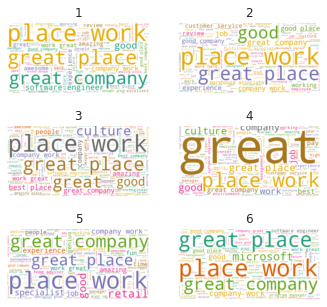

In [ ]:
wc = WordCloud(stopwords = text.ENGLISH_STOP_WORDS.union(['apple' , 'amazon','netflix' , 'google', 'facebook']), 
               background_color = "white" , 
               colormap = "Dark2" ,
               max_font_size = 150 , 
               random_state = 42)


plt.figure(1 , figsize = (5,5))
sns.set(rc={'axes.facecolor':'white'})
for corpus , i in zip(df_summary['summary_corpus'].values,range(6)):
    wc.generate(corpus)
    plt.subplot(3 , 2 , i + 1)
    plt6 = plt.imshow(wc , interpolation="bilinear")
    plt.axis("off")
    plt.title(summary_corpus.index[i])
plt.show()


### Findings and Analysis - Machine Learning Algorithms 

To find the accuracy of congenial between the text reviews and numeric ratings given by individual employees.

In [ ]:
dtf.columns

Index(['company', 'job-title', 'combined_reviews', 'overall-ratings',
       'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'vader_sentiment_score', 'vader_Analysis',
       'polarity_grade'],
      dtype='object')

In [ ]:
X=dtf[['overall-ratings','work-balance-stars','culture-values-stars','carrer-opportunities-stars','comp-benefit-stars','senior-mangemnet-stars']]
y=dtf['vader_sentiment_score']

In [ ]:
y = y.astype(np.int)

In [ ]:

from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_validate
# from sklearn.multioutput import MultiOutputClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=40)

In [ ]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (54023, 6)
X_test dimension=  (13506, 6)
y_train dimension=  (54023,)
y_train dimension=  (13506,)


Random Forest

In [ ]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
RF = RandomForestClassifier(n_estimators = 100) 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
RF.fit(X_train, y_train)
 
# performing predictions on the test dataset
RF.predict(X_test)

RF_result = RF.score(X_test, y_test)
 
print("ACCURACY OF THE MODEL: ", RF_result)

ACCURACY OF THE MODEL:  0.9900784836369021


In [ ]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# # define the model
# model = DecisionTreeRegressor()
# # fit the model
# model.fit(X, y)
# get importance
importance = RF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

ft_imp=pd.DataFrame([x for x in range(len(importance))])

ft_imp['feature_names']=['overall-ratings','work-balance-stars','culture-values-stars','carrer-opportunities-stars','comp-benefit-stars','senior-mangemnet-stars']
ft_imp['values']=(RF.feature_importances_)
ft_imp


# plt.bar(ft_imp['feature_names'],ft_imp['values'])
# plt.show()
# X.columns

Feature: 0, Score: 0.13498
Feature: 1, Score: 0.19497
Feature: 2, Score: 0.10013
Feature: 3, Score: 0.18355
Feature: 4, Score: 0.17076
Feature: 5, Score: 0.21559


,0,feature_names,values
0,0,overall-ratings,0.134982
1,1,work-balance-stars,0.194975
2,2,culture-values-stars,0.100131
3,3,carrer-opportunities-stars,0.183553
4,4,comp-benefit-stars,0.170765
5,5,senior-mangemnet-stars,0.215594


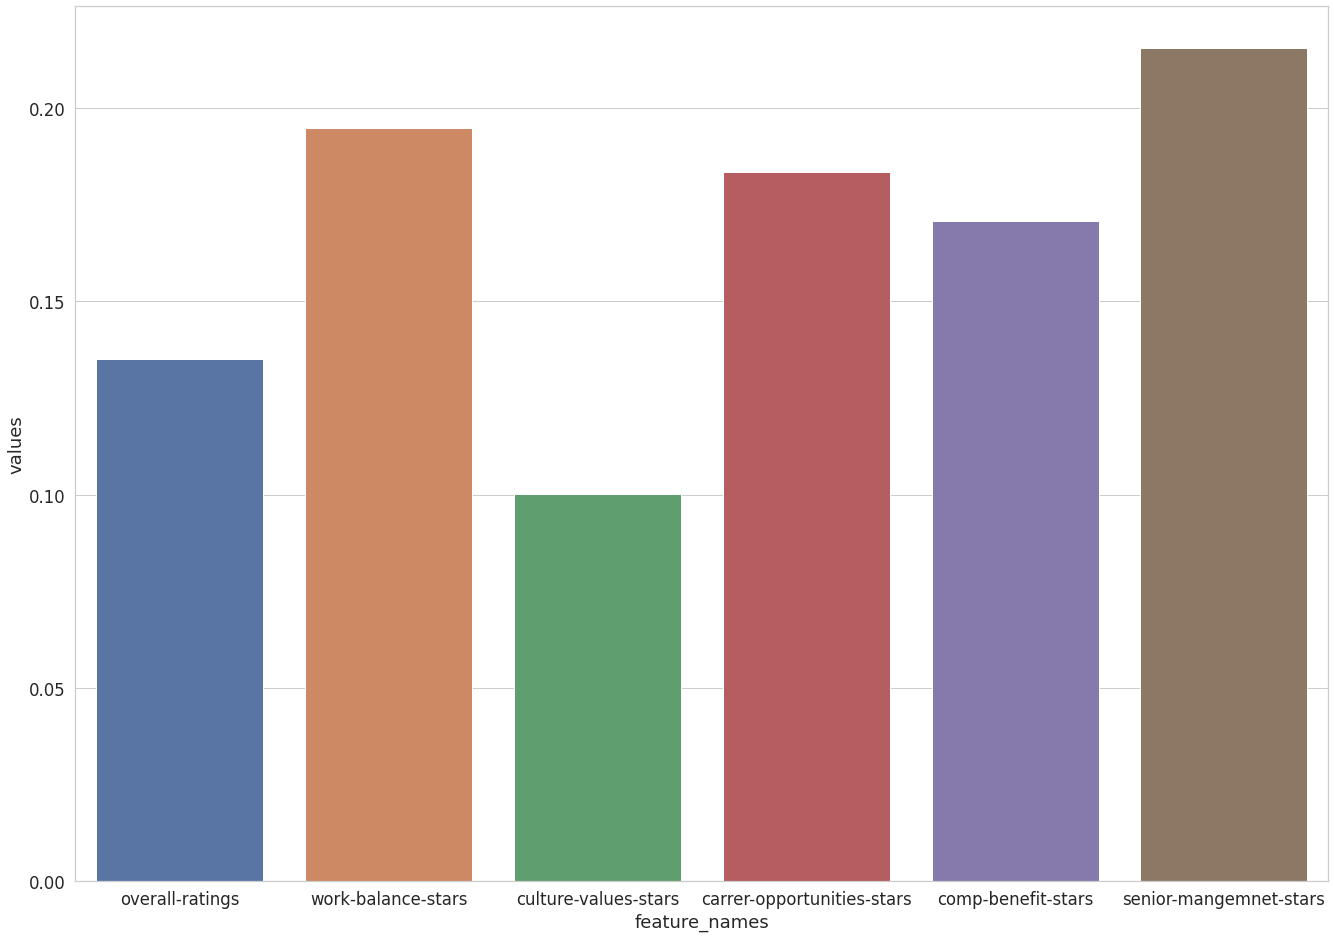

In [ ]:

plt.figure(1 , figsize = (20 , 15))
sns.set(rc={'axes.facecolor':'white'})
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")

ax = sns.barplot(x="feature_names", y="values", data=ft_imp)



In [ ]:
# # Barplot: Add bars
# plt.bar(range(X.shape[1])
# # Add feature names as x-axis labels
# plt.xticks(range(X.shape[1]), ft_imp['feature_names'], rotation=20, fontsize = 8)
# # Create plot title
# plt.title("Feature Importance")
# # Show plot
# plt.show()

In [ ]:
# feat_importances = pd.DataFrame(RF.feature_importances_, index= ft_imp['feature_names'])
# feat_importances.sort_values(by= 'feature_names', ascending=False, inplace=True)
# feat_importances.plot(kind='bar', figsize=(8,6))

AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

ABC = AdaBoostClassifier(n_estimators=100, random_state=0)
ABC.fit(X_train, y_train)

ABC.predict(X_test)

ABC_result = ABC.score(X_test, y_test)

print("ACCURACY OF THE MODEL: ", ABC_result)

ACCURACY OF THE MODEL:  0.9907448541389012


Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GNB.predict(X_test)

GNB_result = GNB.score(X_test, y_test)

print("ACCURACY OF THE MODEL: ", GNB_result)

ACCURACY OF THE MODEL:  0.9550570116985043


Support Vector Machine

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
SVM = make_pipeline(StandardScaler(), SVC(gamma='auto'))
SVM.fit(X_train, y_train)

SVM.predict(X_test)

SVM_result = SVM.score(X_test, y_test)

print("ACCURACY OF THE MODEL: ", SVM_result)


ACCURACY OF THE MODEL:  0.9907448541389012


Multinomial Logistic Regression 

In [ ]:
dt =pd.read_csv("/content/drive/MyDrive/grade_final.csv",encoding='latin-1',index_col=0)
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67529 entries, 1 to 67529
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   company                     67529 non-null  object 
 1   job-title                   67529 non-null  object 
 2   combined_reviews            67122 non-null  object 
 3   overall-ratings             67529 non-null  int64  
 4   work-balance-stars          67529 non-null  float64
 5   culture-values-stars        67529 non-null  float64
 6   carrer-opportunities-stars  67529 non-null  float64
 7   comp-benefit-stars          67529 non-null  float64
 8   senior-mangemnet-stars      67529 non-null  float64
 9   vader_sentiment_score       67529 non-null  float64
 10  vader_Analysis              67529 non-null  object 
 11  polarity_grade              61872 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 6.7+ MB


In [ ]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
dt['polarity_grade']= label_encoder.fit_transform(dt['polarity_grade'])

In [ ]:
from sklearn.model_selection import train_test_split
X = dt[['overall-ratings','work-balance-stars','culture-values-stars','carrer-opportunities-stars','comp-benefit-stars','senior-mangemnet-stars','vader_sentiment_score']]
Y = dt['polarity_grade']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
from sklearn.linear_model import LogisticRegression

#creating the multinomial logistic regression model
LR = LogisticRegression(multi_class='multinomial',solver='lbfgs')
LR.fit(X_train, Y_train)


#evaluating the score of the model
LR_result = LR.score( X_test, Y_test)


print("ACCURACY OF THE MODEL: ", LR_result)

ACCURACY OF THE MODEL:  0.9174440989189989


In [249]:
#ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Y~X', data = dt).fit() #Oridnary least square method
result_anova = sm.stats.anova_lm(model) # ANOVA Test
print(result_anova)


               df         sum_sq     mean_sq           F         PR(>F)
X             7.0    1325.115126  189.302161  116.426819  1.203946e-170
Residual  67521.0  109784.595043    1.625933         NaN            NaN


To find the positive and negative polarities of current and former employees individually

In [ ]:
former = dtf[dtf['job-title'].str.contains('Former Employee')]
former_counts = former['vader_Analysis'].value_counts()
former_counts

Positive    19936
Negative     5053
Name: vader_Analysis, dtype: int64

In [ ]:
current = dtf[dtf['job-title'].str.contains('Current Employee')]
current_counts = current['vader_Analysis'].value_counts()
current_counts

Positive    35215
Negative     7325
Name: vader_Analysis, dtype: int64

### MANOVA
To find the significant difference in the reviews among the current and former employees


In [ ]:
#! pip install statsmodels
import statsmodels 
from statsmodels.multivariate.manova import MANOVA

In [ ]:
# import statsmodels.api as sm 
# from statsmodels.formula.api import ols  

In [ ]:
x = dt[['overall-ratings','work-balance-stars','culture-values-stars','carrer-opportunities-stars','comp-benefit-stars','senior-mangemnet-stars','vader_sentiment_score']]
y = dt['job-title']

In [ ]:

gog_dt = dt.apply(lambda row: row[dt['company'].isin(['google'])])

jx = gog_dt[['overall-ratings','work-balance-stars','culture-values-stars', 'carrer-opportunities-stars','comp-benefit-stars','senior-mangemnet-stars','vader_sentiment_score' ]]
jy = gog_dt['job-title']

# fit manova
manova_result = MANOVA.from_formula('jy ~jx', gog_dt)
print(manova_result.mv_test())

                                   Multivariate linear model
                                                                                               
-----------------------------------------------------------------------------------------------
       Intercept                Value           Num DF    Den DF         F Value         Pr > F
-----------------------------------------------------------------------------------------------
          Wilks' lambda               -0.0000 1352.0000 6460.0000 -3586446448818225.0000 1.0000
         Pillai's trace                1.0000 1352.0000 6460.0000 -3586446448818225.5000 1.0000
 Hotelling-Lawley trace -750599937895083.6250 1352.0000 6460.0000 -3586446448818225.0000 1.0000
    Roy's greatest root -750599937895083.6250 1352.0000 6460.0000 -3586446448818225.0000 1.0000
-----------------------------------------------------------------------------------------------
                                                                           

In [ ]:
fb_dt = dt.apply(lambda row: row[dt['company'].isin(['facebook'])])

jx = fb_dt[['overall-ratings','work-balance-stars','culture-values-stars', 'carrer-opportunities-stars','comp-benefit-stars','senior-mangemnet-stars','vader_sentiment_score' ]]
jy = fb_dt['job-title']

# fit manova
manova_result = MANOVA.from_formula('jy ~jx', fb_dt)
print(manova_result.mv_test())

                               Multivariate linear model
                                                                                        
----------------------------------------------------------------------------------------
       Intercept              Value         Num DF    Den DF        F Value       Pr > F
----------------------------------------------------------------------------------------
          Wilks' lambda             0.0000 434.0000 1149.0000 23563486875685.8633 0.0000
         Pillai's trace             1.0000 434.0000 1149.0000 23563486875685.8633 0.0000
 Hotelling-Lawley trace 8900394520494.0508 434.0000 1149.0000 23563486875685.8633 0.0000
    Roy's greatest root 8900394520494.0508 434.0000 1149.0000 23563486875685.8594 0.0000
----------------------------------------------------------------------------------------
                                                                                        
-----------------------------------------------------

In [ ]:
apl_dt = dt.apply(lambda row: row[dt['company'].isin(['apple'])])

jx = apl_dt[['overall-ratings','work-balance-stars','culture-values-stars', 'carrer-opportunities-stars','comp-benefit-stars','senior-mangemnet-stars','vader_sentiment_score' ]]
jy = apl_dt['job-title']

# fit manova
manova_result = MANOVA.from_formula('jy ~jx', apl_dt)
print(manova_result.mv_test())

                                  Multivariate linear model
                                                                                             
---------------------------------------------------------------------------------------------
       Intercept               Value           Num DF    Den DF         F Value        Pr > F
---------------------------------------------------------------------------------------------
          Wilks' lambda               0.0000 1772.0000 11171.0000 962423220670992.8750 0.0000
         Pillai's trace               1.0000 1772.0000 11171.0000 962423220670993.0000 0.0000
 Hotelling-Lawley trace 152664394148151.4062 1772.0000 11171.0000 962423220670992.8750 0.0000
    Roy's greatest root 152664394148151.4062 1772.0000 11171.0000 962423220670992.8750 0.0000
---------------------------------------------------------------------------------------------
                                                                                             


In [ ]:
net_dt = dt.apply(lambda row: row[dt['company'].isin(['netflix'])])

jx = net_dt[['overall-ratings','work-balance-stars','culture-values-stars', 'carrer-opportunities-stars','comp-benefit-stars','senior-mangemnet-stars','vader_sentiment_score' ]]
jy = net_dt['job-title']

# fit manova
manova_result = MANOVA.from_formula('jy ~jx', net_dt)
print(manova_result.mv_test())

                                Multivariate linear model
                                                                                         
-----------------------------------------------------------------------------------------
       Intercept               Value         Num DF   Den DF        F Value        Pr > F
-----------------------------------------------------------------------------------------
          Wilks' lambda              0.0000 204.0000 599.0000 226047945097611.2188 0.0000
         Pillai's trace              1.0000 204.0000 599.0000 226047945097611.1875 0.0000
 Hotelling-Lawley trace 76984609014879.2812 204.0000 599.0000 226047945097611.1875 0.0000
    Roy's greatest root 76984609014879.2812 204.0000 599.0000 226047945097611.2188 0.0000
-----------------------------------------------------------------------------------------
                                                                                         
------------------------------------------

In [ ]:
mic_dt = dt.apply(lambda row: row[dt['company'].isin(['microsoft'])])

jx = mic_dt[['overall-ratings','work-balance-stars','culture-values-stars', 'carrer-opportunities-stars','comp-benefit-stars','senior-mangemnet-stars','vader_sentiment_score' ]]
jy = mic_dt['job-title']

# fit manova
manova_result = MANOVA.from_formula('jy ~jx', mic_dt)
print(manova_result.mv_test())

                                 Multivariate linear model
                                                                                            
--------------------------------------------------------------------------------------------
       Intercept               Value          Num DF    Den DF         F Value        Pr > F
--------------------------------------------------------------------------------------------
          Wilks' lambda              0.0000 2349.0000 15574.0000 259644476268037.5000 0.0000
         Pillai's trace              1.0000 2349.0000 15574.0000 259644476268037.5000 0.0000
 Hotelling-Lawley trace 39161735890177.2266 2349.0000 15574.0000 259644476268037.5000 0.0000
    Roy's greatest root 39161735890177.2266 2349.0000 15574.0000 259644476268037.5000 0.0000
--------------------------------------------------------------------------------------------
                                                                                            
-----------